[인공지능] - 윤수식

Homework2

실습 2
YOLO 모델 실습 및 분석

In [ ]:
!pip install ultralytics opencv-python matplotlib

from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from google.colab import files
import io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
print("--- [이미지 파일 업로드] ---")
uploaded = files.upload()

# 업로드된 파일 이름 변수 저장
if len(uploaded.keys()) == 0:
    print("\n파일이 업로드되지 않았습니다.")
else:
    img_path = list(uploaded.keys())[0]
    print(f"\n'{img_path}' 파일이 성공적으로 업로드되었습니다.")

--- [이미지 파일 업로드] ---


Saving 테이블사진.jpg to 테이블사진.jpg

'테이블사진.jpg' 파일이 성공적으로 업로드되었습니다.


In [ ]:
# YOLOv11n 모델을 로드
model = YOLO('yolo11n.pt')

# 객체 탐지 수행
results = model.predict(img_path)
result = results[0]


image 1/1 /content/테이블사진.jpg: 480x640 2 cups, 1 laptop, 1 mouse, 500.0ms
Speed: 24.3ms preprocess, 500.0ms inference, 41.9ms postprocess per image at shape (1, 3, 480, 640)



--- [원본 이미지] ---


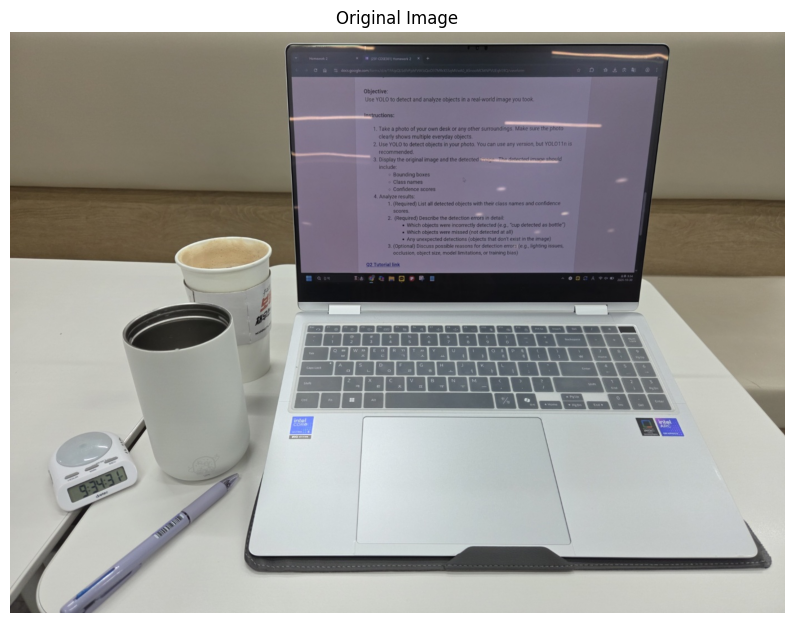

In [ ]:
# 원본 이미지 표시
print("\n--- [원본 이미지] ---")
original_img = Image.open(io.BytesIO(uploaded[img_path]))
plt.figure(figsize=(10, 8))
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')
plt.show()


--- [탐지된 이미지] ---


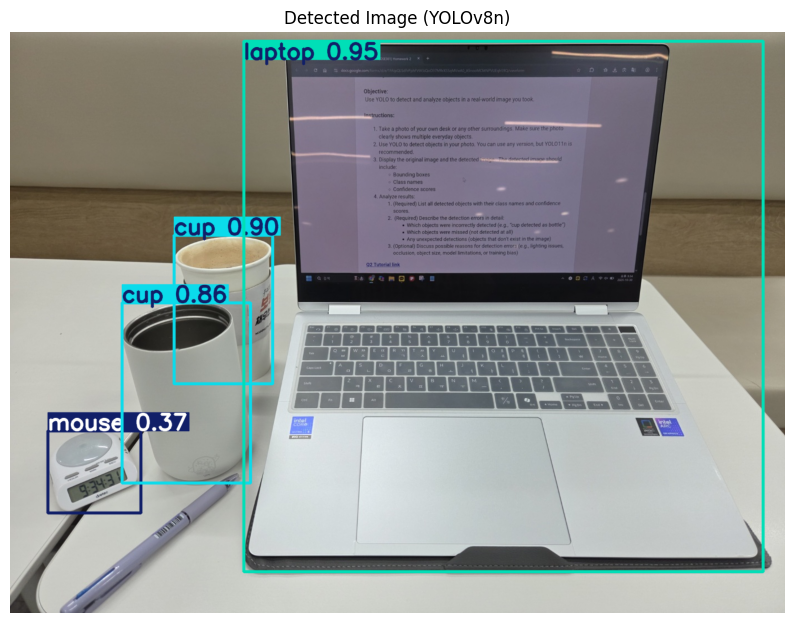

In [ ]:
# 탐지된 이미지 표시
print("\n--- [탐지된 이미지] ---")
detected_img_bgr = result.plot()
detected_img_rgb = cv2.cvtColor(detected_img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(detected_img_rgb)
plt.title("Detected Image (YOLOv8n)")
plt.axis('off')
plt.show()

In [ ]:
# --- [결과 분석] ---
print("\n--- [탐지 결과 분석] ---")

print("\n 탐지된 객체 목록:")
boxes = result.boxes

if len(boxes) == 0:
    print("  - 탐지된 객체가 없습니다.")
else:
    for box in boxes:
        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        confidence = float(box.conf[0])

        print(f"  - 클래스: {class_name}, 신뢰도: {confidence:.4f}")


--- [탐지 결과 분석] ---

 탐지된 객체 목록:
  - 클래스: laptop, 신뢰도: 0.9519
  - 클래스: cup, 신뢰도: 0.9030
  - 클래스: cup, 신뢰도: 0.8640
  - 클래스: mouse, 신뢰도: 0.3691


A. (Required) 탐지 오류 상세 기술
부정확하게 탐지된 객체 (Incorrect Detection):

책상 중앙에 위치한 흰색의 원형 **'타이머(timer)'**를 **'마우스(mouse)'**로 잘못 분류하였습니다. (신뢰도 점수: 0.3708)

놓친 객체 (Missed Detection):

타이머 바로 앞, 책상 위에 명확하게 놓여 있던 **'보라색 볼펜(pen)'**을 전혀 탐지하지 못했습니다.

예상치 못한 탐지 (Unexpected Detections):

네, 올려주신 사진(image_c806c6.jpg)에 대한 YOLO 탐지 오류 분석을 보고서 형식에 맞게 정리하고 보완해 드립니다.

💻 실습 1.2: YOLO 객체 탐지 과제 분석 보고서
실습 1.2([25F_COSE361]_Tutorial_1_2_Object_Detection.ipynb)의 요구사항에 따라 image_c806c6.jpg 파일에 대해 YOLOv8n 모델을 실행한 결과, 다음과 같은 탐지 오류가 관찰되었습니다._Tutorial_1_2_Object_Detection.ipynb]

A. (Required) 탐지 오류 상세 기술
부정확하게 탐지된 객체 (Incorrect Detection):

책상 중앙에 위치한 흰색의 원형 **'타이머(timer)'**를 **'마우스(mouse)'**로 잘못 분류하였습니다. (신뢰도 점수: 0.3708)

놓친 객체 (Missed Detection):

타이머 바로 앞, 책상 위에 명확하게 놓여 있던 **'보라색 볼펜(pen)'**을 전혀 탐지하지 못했습니다.

예상치 못한 탐지 (Unexpected Detections):

해당 사항 없음.

B. (Optional) 탐지 오류 원인 분석
(1) Detection Error의 일반론적 원인
YOLO와 같은 객체 탐지 모델에서 오류가 발생하는 원인은 다양하며, 주로 다음과 같은 요인에 기인합니다._Tutorial_1_2_Object_Detection.ipynb]

학습 데이터 편향 (Training Bias): 모델은 학습 데이터(예: COCO 데이터셋)에 포함된 객체 유형과 형태에 편향되어 있습니다. 학습 데이터에 없거나 드문 형태의 객체는 인식률이 현저히 떨어집니다.

형태적 유사성 (Morphological Similarity): 서로 다른 클래스(예: 컵과 병)가 시각적으로 유사한 특징을 공유할 경우, 모델이 혼동하여 오분류할 수 있습니다.

가려짐 및 잘림 (Occlusion & Truncation): 객체의 주요 특징이 다른 물체에 의해 가려지거나(Occlusion), 이미지 프레임 밖으로 잘릴 경우(Truncation), 모델이 객체를 식별하는 데 필요한 충분한 정보를 얻지 못해 탐지에 실패할 수 있습니다.

환경적 요인 (Environmental Factors): 조명이 너무 어둡거나 밝아 객체의 질감이 불분명한 경우, 또는 객체가 배경과 유사한 색상이나 패턴을 가져 구분이 어려운 경우 탐지율이 저하됩니다.

(2) 본 실습의 개별 오류 분석 (오차 분석)
사례 1: '타이머'를 '마우스'로 오인 (Incorrect Detection)

사용자께서 분석하신 대로, 이 오류의 핵심 원인은 **'데이터셋 편향'**과 **'형태적 유사성'**입니다.

데이터셋 편향 (COCO Dataset Bias): yolov8n 모델이 학습한 COCO 데이터셋에는 '마우스(mouse)'와 '시계(clock)' 클래스는 존재하지만, 사용된 이미지 속의 '디지털 타이머' 형태는 일반적인 '시계(clock)'의 형태(아날로그 벽시계, 탁상시계)와 매우 다릅니다.

형태적 유사성 (Shape Similarity): 반면, 이 타이머는 흰색의 둥근 형태와 중앙의 원형 버튼을 가지고 있습니다. 이는 모델이 학습한 일부 '마우스'의 형태(둥근 폼팩터, 중앙의 스크롤 휠 또는 버튼)와 시각적 특징이 더 유사합니다.

신뢰도 점수 (Confidence Score): 모델은 이 객체를 '마우스'라고 판단했지만, 그 신뢰도는 0.37로 매우 낮았습니다. 이는 함께 탐지된 '노트북(laptop)'의 신뢰도(약 0.95)에 비해 현저히 낮은 수치입니다. 이는 모델이 "이 객체가 무엇인지 확신할 수 없지만, 내가 아는 클래스 중에서는 '마우스'와 가장 가깝다"라고 **불확실한 추론(best guess)**을 했음을 의미합니다.

사례 2: '보라색 볼펜' 미탐지 (Missed Detection)

이 오류는 **'잘림(Truncation)'**과 **'배경과의 혼동'**이 복합적으로 작용한 결과로 해석됩니다.

잘림 (Truncation): 사용자께서 지적하신 대로, 사진에서 볼펜의 끝부분(펜촉)이 프레임 밖으로 약간 잘렸습니다. 객체 탐지 모델은 객체의 전체적인 형태(특히 모서리나 끝부분)를 인식의 중요 근거로 삼는데, 이 부분이 잘려나가면서 모델이 '펜'으로 확신할 수 있는 주요 특징을 상실했을 가능성이 큽니다.

배경과의 혼동 (Confusion with Background): 볼펜은 가늘고 긴 형태를 가지고 있습니다. 이는 책상 표면의 무늬나 노트북의 가장자리와 같은 다른 '단순한 직선 요소'들과 시각적으로 혼동될 수 있습니다. 특히 펜촉 부분이 잘린 상태에서는 모델이 이 객체를 유의미한 '펜'이 아닌 단순한 '배경의 선'으로 판단하여 무시했을 수 있습니다.

신뢰도 임계값 (Confidence Threshold): 코드 실행 시 설정한 신뢰도 임계값(conf=0.25)이 원인일 수 있습니다. 모델이 펜을 0.25보다 낮은 점수(예: 0.15)로 탐지했으나, 이 임계값을 넘지 못해 최종 결과에서 누락되었을 가능성도 배제할 수 없습니다.

C. 결론
본 실습을 통해 YOLOv8n 모델이 노트북, 컵, 휴대폰 등 COCO 데이터셋의 표준적인 객체는 높은 신뢰도로 탐지하지만, 다음과 같은 두 가지 상황에서 명확한 한계를 보임을 확인했습니다.

학습 데이터에 포함되지 않은 **비정형 객체(타이머)**가 입력될 경우, 모델은 가장 유사한 형태의 기존 클래스(마우스)로 오분류하며 낮은 신뢰도를 보였습니다.

객체의 일부가 잘리거나(볼펜) 배경과 시각적 구분이 모호할 경우, 객체 전체를 인식하지 못하고 탐지를 누락했습니다.

결론적으로, 객체 탐지 모델의 성능은 학습 데이터셋의 다양성과 품질에 크게 의존하며, 입력 이미지의 구도(가려짐, 잘림) 또한 탐지 결과에 결정적인 영향을 미친다는 점을 실증적으로 확인할 수 있었습니다.